In [ ]:
# CE224_FINAL.ipynb
#
# CE 224, Adv. Algorithms and Data Structures
# Lincoln Scheer
# Spring 2024
# Fort Lewis College

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Network Functions

def forward_pass(x, W, b, f):
    """
    Function completes a forward propegation of input data through given network
    weights, biases, and activation functions.

    INPUT:
        x = input row vector array
        W = network weight matrix array
        b = network bias row vector array
        f = network activation function array

    OUTPUT:
        Z = array of pre-activated neuron row vectors
        A = array of activated neuron row vectors
    """
    Z = []
    A = [x]

    # forward propegation, 0th layer activations are inputs!
    for j in range(1, len(f)):
        Z.append(W[j-1]@A[j-1]+b[j-1])  # weighted sum
        A.append(f[j-1](Z[j-1]))        # apply activation function

    return A, Z

def backward_pass(C, fp, Z, A, W, b, lr):
    """
    Function completes a backpropegation algorithm based on the costs or average
    costs of a traning set. Returns new weights and biases for network based on
    learning rate.

    INPUT:
        C = cost of network performance on a training set
        fp = derivitives of activation functions used
        Z = array of pre-activated neuron row vectors
        A = array of activated neuron row vectors
        W = network weight matrix array
        b = network bias row vector array
        lr = learning rate

    OUTPUT:
        W_new = new network weight matrix array
        b_new = new network bias row vector array
    """
    # calculate output layer dZ
    dZ0 = np.dot(C, fp[-1](Z[-1]))
    dZs = [dZ0]

    # calculate all dZs, starting with the pre-output layer moving to the 1st
    for l in range(n-2, 0, -1):
        dZ = np.dot(W[l].T*dZs[0], fp[l](Z[l]))
        dZs.insert(0, dZ)

    W_new = W
    b_new = b

    # calculate dW and dB with dZs, adjust weights and biases according to the
    # learning rate
    for l in range(n-1, 0, -1):
        dWl = np.outer(dZs[l-1], A[l-1])
        dBl = np.sum(dZs[l-1])
        W_new[l-1] = W[l-1] - lr*dWl
        b_new[l-1] = b[l-1] - lr*dBl

    return W_new, b_new

def log_loss(Y_hat, Y):
    """
    Function applies the cross entropy log loss function to a set of labeled
    truths and predicted values.

    INPUT:
        Y_hat = labeled true values
        Y = predicted values

    OUTPUT:
        return = log loss result
    """
    return -np.mean(Y_hat * np.log(Y) + (1 - Y_hat) * np.log(1 - Y))

def sel_loss(Y_hat, Y):
    """
    Function applies the squared error loss function to a set of labeled
    truths and predicted values.

    INPUT:
        Y_hat = labeled true values
        Y = predicted values

    OUTPUT:
        return = sel loss result
    """
    return (Y_hat - Y)**2

def loss(Y_hat, Y_pred, func=sel_loss):
    """
    Function applies the loss function passed to the function

    INPUT:
        Y_hat = labeled true values
        Y = predicted values
        func = loss function, default sel_loss()

    OUTPUT:
        return = loss result
    """
    return func(Y_hat, Y_pred)

In [ ]:
# Network Class

class Network:
    """
    Class reperesents the acrchitecture of a neural network, including weights,
    biases, layer sizes, and layer activations.
    """

    def __init__(self, size, activations, activationsp):
        """
        Constructor sets member variables and initializes networks weights and
        biases based on the layer size descriptions.

        INPUT:
            size = array of layer sizes
            activations = array of lambda functions of activations
            activationsp = array of lambdat functions of activations derivative

        OUTPUT:
            Network = Network class object
        """
        self.size = size
        self.activations = activations
        self.activationsp = activationsp
        self.W = []
        self.b = []

        # initialize weights and biases.
        for i in range(1, len(size)):
            last = size[i-1]
            curr = size[i]
            self.W.append(np.random.rand(curr, last))
            self.b.append(np.random.rand(curr))

    def train(self, x, y, epochs=10, lr=0.01):
        """
        Function trains neural network based on a set of training data,
        specified number of epochs, and learning rate.

        INPUT:
            x = array of input data
            y = array of labeled output data
            epochs = number of iterations to train network
            lr = initial learning rate

        """

        avg_costs = []
        avg_cost_last = 0

        # training iteation per epoch
        for epoch in range(epochs):

            avg_cost = 0
            W_sum = self.W
            b_sum = self.b

            # backpropegation

            # calculate deltas
            for j in range(len(Xs)):
                X = Xs[j]
                Y_hat = Ys_hat[j]
                A, Z = forward_pass(X, self.W, self.b, activations)
                C = loss(Y_hat, A[-1])
                W_new, b_new = backward_pass(C, activationsp, Z, A, self.W, self.b, lr)
                for k in range(len(self.W)):
                    W_sum[k] += W_new[k]
                    b_sum[k] += b_new[k]

                avg_cost += C/len(Xs)

            # update weights based on average gradient
            for k in range(len(self.W)):
                self.W[k] -= lr * W_sum[k] / len(Xs)
                self.b[k] -= lr * b_sum[k] / len(Xs)

            # update learning rate based on average cost.
            if avg_cost_last < avg_cost:
                lr += 0.001
            else:
                lr -= 0.001
            avg_costs.append(avg_cost)
            avg_cost_last = avg_cost
            print(f"Network Avg. Cost for Epoch {epoch}: {avg_cost}\n")

        # plot report
        plt.plot(range(0, epochs), avg_costs, 'o-')
        plt.title("Network Performance")
        plt.xlabel("Epoch Number")
        plt.ylabel("Loss")
        plt.grid()

    def predict(self, x):
        """
        Inferences network on input and returns prediction.

        INPUT:
            x = input row vector

        OUTPUT:
            return = output row vector
        """
        A, Z = forward_pass(x, self.W, self.b, self.activations)
        return A[-1]

Network Avg. Cost for Epoch 0: [0.99790568]

Network Avg. Cost for Epoch 1: [1.]

Network Avg. Cost for Epoch 2: [1.]

Network Avg. Cost for Epoch 3: [1.]

Network Avg. Cost for Epoch 4: [1.]

Network Avg. Cost for Epoch 5: [1.]

Network Avg. Cost for Epoch 6: [1.]

Network Avg. Cost for Epoch 7: [1.]

Network Avg. Cost for Epoch 8: [1.]

Network Avg. Cost for Epoch 9: [1.]

Network Avg. Cost for Epoch 10: [1.]

Network Avg. Cost for Epoch 11: [1.]

Network Avg. Cost for Epoch 12: [1.]

Network Avg. Cost for Epoch 13: [1.]

Network Avg. Cost for Epoch 14: [1.]

Network Avg. Cost for Epoch 15: [1.]

Network Avg. Cost for Epoch 16: [1.]

Network Avg. Cost for Epoch 17: [1.]

Network Avg. Cost for Epoch 18: [1.]

Network Avg. Cost for Epoch 19: [1.]

Network Avg. Cost for Epoch 20: [1.]

Network Avg. Cost for Epoch 21: [1.]

Network Avg. Cost for Epoch 22: [1.]

Network Avg. Cost for Epoch 23: [1.]

Network Avg. Cost for Epoch 24: [1.]

Network Avg. Cost for Epoch 25: [1.]

Network Avg. C

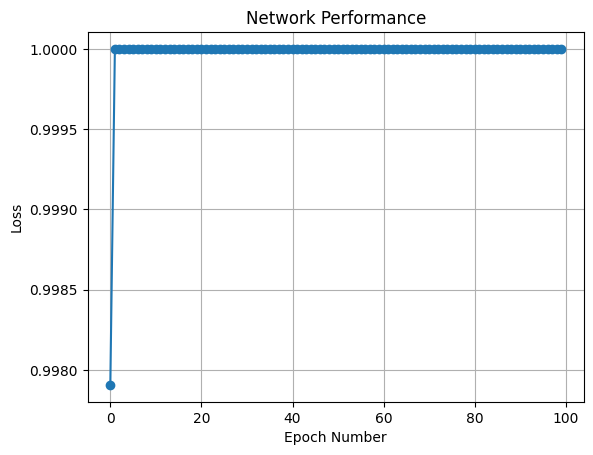

In [ ]:
#%% Network Usage

# Step 1:
# User-Defined Activation Functions
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoidp = lambda x: sigmoid(x)*(1-sigmoid(x))
linear = lambda x: x
linearp = lambda x: 1

# Setp 2:
# Define Network Architecture
size = [2, 10, 10, 10, 10, 1]
activations = [linear, sigmoid, sigmoid, sigmoid, sigmoid, linear]
activationsp = [linearp, sigmoidp, sigmoidp, sigmoidp, sigmoidp, linearp]
n = len(size)

# Step 3:
# Generate Network
net = Network(size, activations, activationsp)

# Step 4:
# Define Dataset, XOR Gate
Xs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Ys_hat = np.array([[0], [0], [0], [0]])

# Step 5:
# Train Network
net.train(Xs, Ys_hat, epochs=100, lr=0.1)